In [1]:
import numpy as np
import os
import pandas as pd
import wandb
from tqdm.auto import tqdm
import pandas as pd
import h5py as h5
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
f = h5.File("<redacted>","r")
SIGNAL_NAMES = list(f["Signal_data"].keys())
f.close()

In [ ]:
import wandb
api = wandb.Api()
df_list = []
run_list = []
for run in tqdm(api.runs("dc250601/ContrastiveVAEQkeras")):
    
    try:
        history = run.history()
        history = history[50:][:]
    
    
        pure_scores = []
        raw_scores = []
        for s_ in SIGNAL_NAMES:
            pure_scores.append(list(history[f"pure-pure/{s_}"])[-1])
            raw_scores.append(list(history[f"raw-pure/{s_}"])[-1])
    
    
        df = pd.DataFrame()
        df["Signal Names"] = SIGNAL_NAMES
        df["pure-pure"] = pure_scores
        df["raw-pure"] = raw_scores
    
        df_list.append(df)
        run_list.append(run)
    except:
        continue

  0%|          | 0/1138 [00:00<?, ?it/s]

0it [00:00, ?it/s]

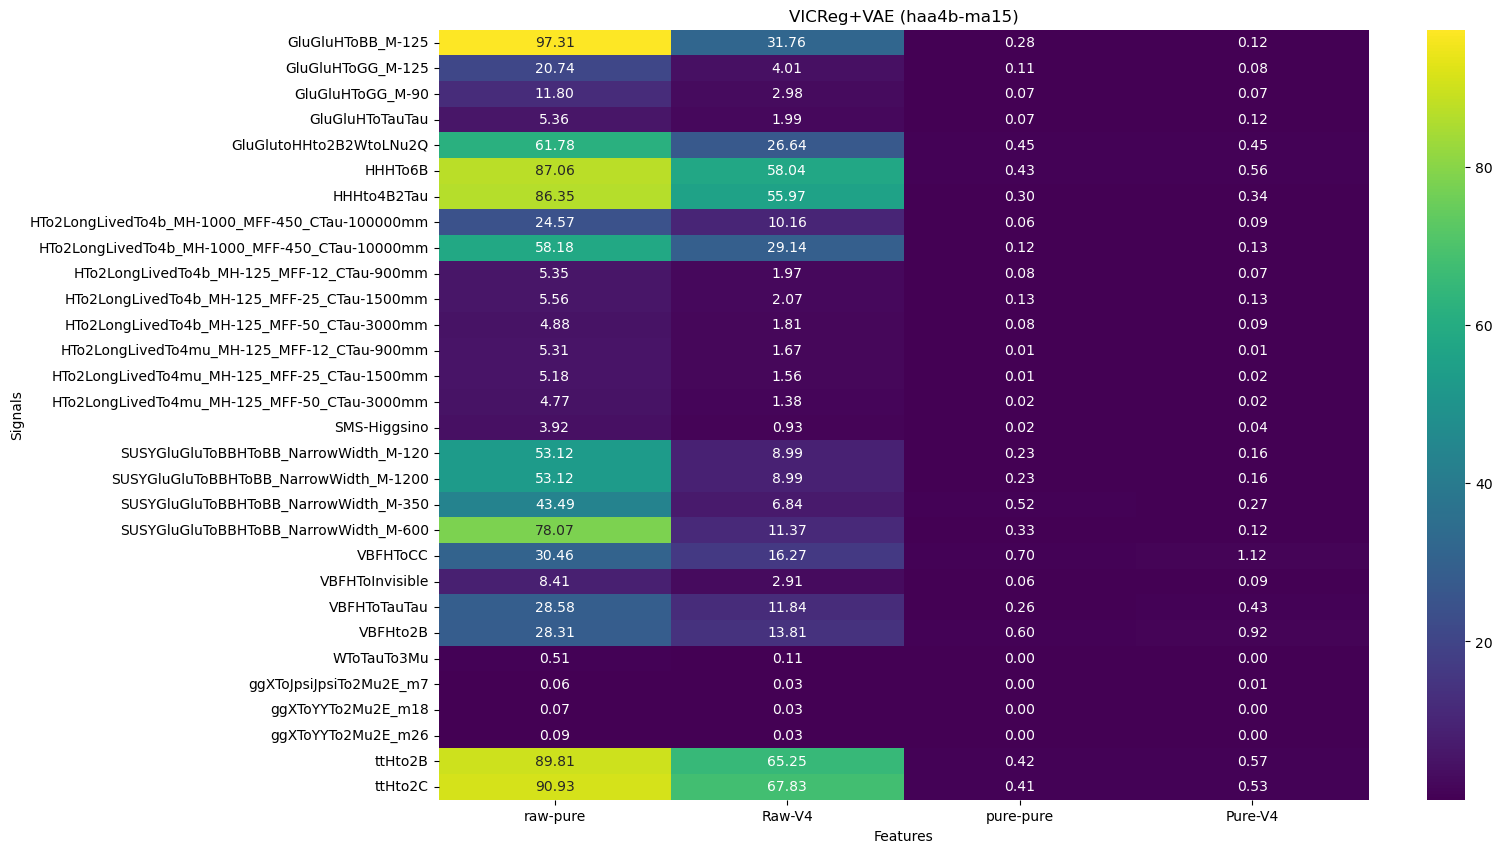

In [4]:
search_signal = "haa4b-ma15"
signal_pos = np.where(np.array(SIGNAL_NAMES)==search_signal)[0][0]
best_df = None
max_ = 0
index = None
for i,df in tqdm(enumerate(df_list)):
    score = df.loc[signal_pos,"raw-pure"]
    if score > max_:
        max_ = score
        best_df = df
        index = i

df_v4 = pd.read_csv("../l1ad-train-run381148-HP/efficiency@1kHz_pure.csv")
df_v4 = df_v4.drop(16) #QCD
df_v4 = df_v4.drop(0) #QCD
best_df = best_df.drop(28)

best_df["Raw-V4"] = list(map(lambda x: 100*float(x), df_v4.iloc[:,2]))
best_df["Pure-V4"] = list(map(lambda x: 100*float(x), df_v4.iloc[:,5]))

best_df = best_df[["Signal Names","raw-pure","Raw-V4","pure-pure","Pure-V4"]]

plt.figure(figsize=(15, 10))

# Setting Signal_name as the index for better labeling
heatmap_data = best_df.set_index("Signal Names")[["raw-pure","Raw-V4","pure-pure","Pure-V4"]]

sns.heatmap(heatmap_data, cmap="viridis", annot=True, fmt=".2f")
plt.title("VICReg+VAE (haa4b-ma15)")
plt.xlabel("Features")
plt.ylabel("Signals")
plt.show()

In [5]:
best_df

,Signal Names,raw-pure,Raw-V4,pure-pure,Pure-V4
0,GluGluHToBB_M-125,97.311433,31.758643,0.278473,0.117837
1,GluGluHToGG_M-125,20.742679,4.013107,0.110533,0.080201
2,GluGluHToGG_M-90,11.799203,2.984091,0.074704,0.066573
3,GluGluHToTauTau,5.361436,1.985742,0.067765,0.118463
4,GluGlutoHHto2B2WtoLNu2Q,61.779659,26.637989,0.448451,0.451514
5,HHHTo6B,87.057452,58.044617,0.431635,0.561763
6,HHHto4B2Tau,86.353149,55.971198,0.300591,0.344990
7,HTo2LongLivedTo4b_MH-1000_MFF-450_CTau-100000mm,24.569916,10.162041,0.063410,0.085465
8,HTo2LongLivedTo4b_MH-1000_MFF-450_CTau-10000mm,58.182022,29.144983,0.119309,0.134223
9,HTo2LongLivedTo4b_MH-125_MFF-12_CTau-900mm,5.348325,1.965042,0.081035,0.073438


0it [00:00, ?it/s]

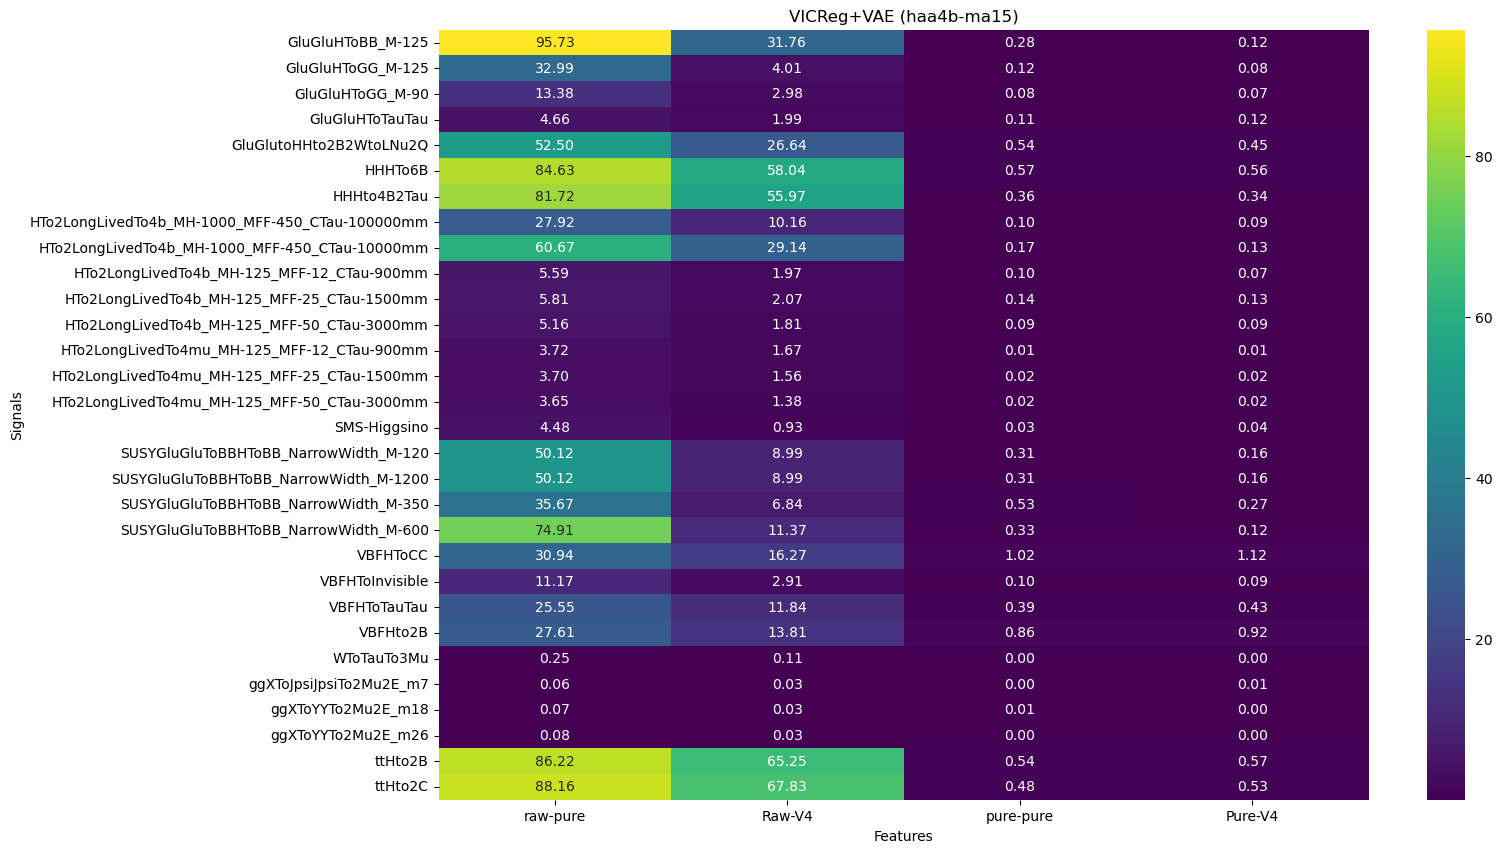

In [6]:
search_signal = "haa4b-ma15"
signal_pos = np.where(np.array(SIGNAL_NAMES)==search_signal)[0][0]
best_df = None
max_ = 0
index = None
for i,df in tqdm(enumerate(df_list)):
    score = df.loc[signal_pos,"pure-pure"]
    if score > max_:
        max_ = score
        best_df = df
        index = i

df_v4 = pd.read_csv("../l1ad-train-run381148-HP/efficiency@1kHz_pure.csv")
df_v4 = df_v4.drop(16) #QCD
df_v4 = df_v4.drop(0) #QCD
best_df = best_df.drop(28)

best_df["Raw-V4"] = list(map(lambda x: 100*float(x), df_v4.iloc[:,2]))
best_df["Pure-V4"] = list(map(lambda x: 100*float(x), df_v4.iloc[:,5]))

best_df = best_df[["Signal Names","raw-pure","Raw-V4","pure-pure","Pure-V4"]]

plt.figure(figsize=(15, 10))

# Setting Signal_name as the index for better labeling
heatmap_data = best_df.set_index("Signal Names")[["raw-pure","Raw-V4","pure-pure","Pure-V4"]]

sns.heatmap(heatmap_data, cmap="viridis", annot=True, fmt=".2f")
plt.title("VICReg+VAE (haa4b-ma15)")
plt.xlabel("Features")
plt.ylabel("Signals")
plt.show()

In [7]:
best_df

,Signal Names,raw-pure,Raw-V4,pure-pure,Pure-V4
0,GluGluHToBB_M-125,95.730087,31.758643,0.279584,0.117837
1,GluGluHToGG_M-125,32.991795,4.013107,0.119273,0.080201
2,GluGluHToGG_M-90,13.384762,2.984091,0.080294,0.066573
3,GluGluHToTauTau,4.656182,1.985742,0.106416,0.118463
4,GluGlutoHHto2B2WtoLNu2Q,52.498514,26.637989,0.542754,0.451514
5,HHHTo6B,84.633029,58.044617,0.569910,0.561763
6,HHHto4B2Tau,81.715917,55.971198,0.359627,0.344990
7,HTo2LongLivedTo4b_MH-1000_MFF-450_CTau-100000mm,27.922364,10.162041,0.102007,0.085465
8,HTo2LongLivedTo4b_MH-1000_MFF-450_CTau-10000mm,60.665150,29.144983,0.171507,0.134223
9,HTo2LongLivedTo4b_MH-125_MFF-12_CTau-900mm,5.591431,1.965042,0.103826,0.073438


In [9]:
df_list[36]

,Signal Names,pure-pure,raw-pure
0,GluGluHToBB_M-125,0.279584,95.730087
1,GluGluHToGG_M-125,0.119273,32.991795
2,GluGluHToGG_M-90,0.080294,13.384762
3,GluGluHToTauTau,0.106416,4.656182
4,GluGlutoHHto2B2WtoLNu2Q,0.542754,52.498514
5,HHHTo6B,0.569910,84.633029
6,HHHto4B2Tau,0.359627,81.715917
7,HTo2LongLivedTo4b_MH-1000_MFF-450_CTau-100000mm,0.102007,27.922364
8,HTo2LongLivedTo4b_MH-1000_MFF-450_CTau-10000mm,0.171507,60.665150
9,HTo2LongLivedTo4b_MH-125_MFF-12_CTau-900mm,0.103826,5.591431


  0%|          | 0/866 [00:00<?, ?it/s]

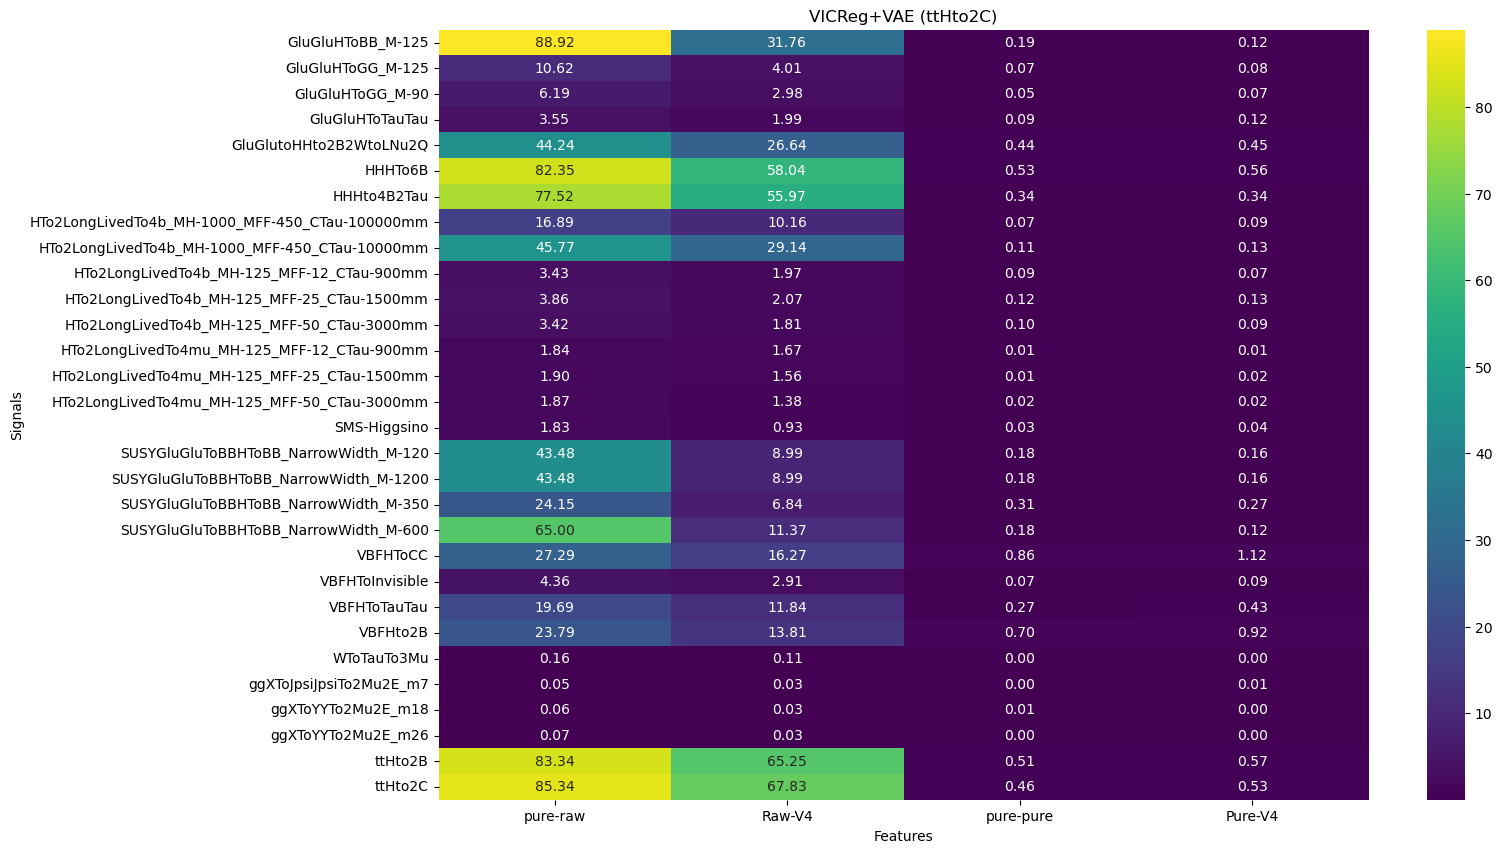

In [26]:
search_signal = "ttHto2C"
signal_pos = np.where(np.array(SIGNAL_NAMES)==search_signal)[0][0]
best_df = None
max_ = 0
for df in tqdm(df_list):
    score = df.loc[signal_pos,"pure-pure"]
    if score > max_:
        max_ = score
        best_df = df

df_v4 = pd.read_csv("../l1ad-train-run381148-HP/efficiency@1kHz_pure.csv")
df_v4 = df_v4.drop(16) #QCD
df_v4 = df_v4.drop(0) #QCD
best_df = best_df.drop(28)

best_df["Raw-V4"] = list(map(lambda x: 100*float(x), df_v4.iloc[:,2]))
best_df["Pure-V4"] = list(map(lambda x: 100*float(x), df_v4.iloc[:,5]))

best_df = best_df[["Signal Names","pure-raw","Raw-V4","pure-pure","Pure-V4"]]

plt.figure(figsize=(15, 10))

# Setting Signal_name as the index for better labeling
heatmap_data = best_df.set_index("Signal Names")[["pure-raw","Raw-V4","pure-pure","Pure-V4"]]

sns.heatmap(heatmap_data, cmap="viridis", annot=True, fmt=".2f")
plt.title("VICReg+VAE (ttHto2C)")
plt.xlabel("Features")
plt.ylabel("Signals")
plt.show()

  0%|          | 0/649 [00:00<?, ?it/s]

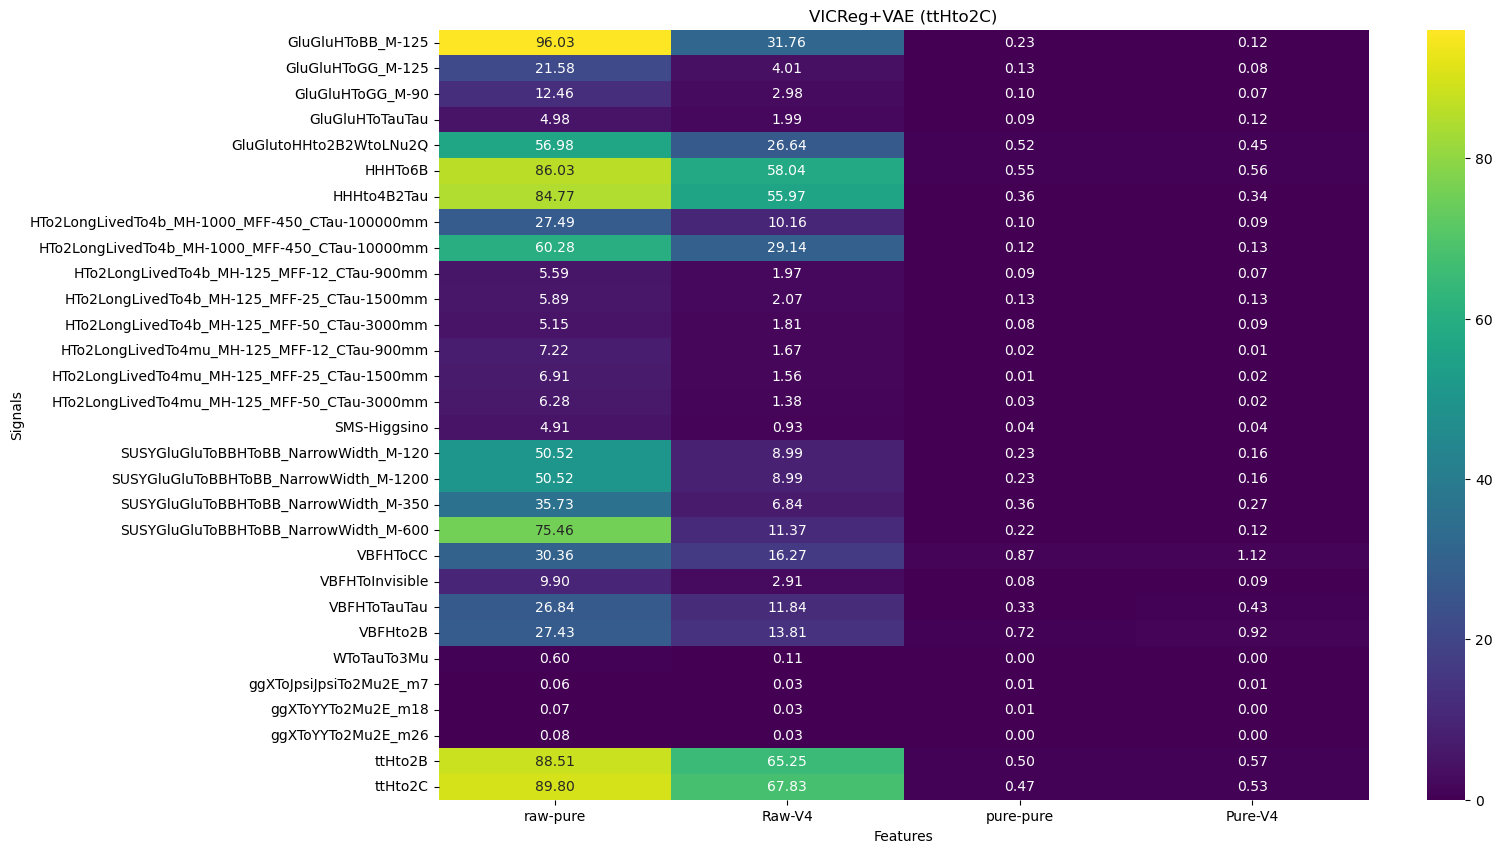

In [11]:
search_signal = "ttHto2C"
signal_pos = np.where(np.array(SIGNAL_NAMES)==search_signal)[0][0]
best_df = None
max_ = 0
for df in tqdm(df_list):
    score = df.loc[signal_pos,"raw-pure"]
    if score > max_:
        max_ = score
        best_df = df

df_v4 = pd.read_csv("../l1ad-train-run381148-HP/efficiency@1kHz_pure.csv")
df_v4 = df_v4.drop(16) #QCD
df_v4 = df_v4.drop(0) #QCD
best_df = best_df.drop(28)

best_df["Raw-V4"] = list(map(lambda x: 100*float(x), df_v4.iloc[:,2]))
best_df["Pure-V4"] = list(map(lambda x: 100*float(x), df_v4.iloc[:,5]))

best_df = best_df[["Signal Names","raw-pure","Raw-V4","pure-pure","Pure-V4"]]

plt.figure(figsize=(15, 10))

# Setting Signal_name as the index for better labeling
heatmap_data = best_df.set_index("Signal Names")[["raw-pure","Raw-V4","pure-pure","Pure-V4"]]

sns.heatmap(heatmap_data, cmap="viridis", annot=True, fmt=".2f")
plt.title("VICReg+VAE (ttHto2C)")
plt.xlabel("Features")
plt.ylabel("Signals")
plt.show()